In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load scaled dataset
data = pd.read_csv("pirvision_transformed.csv")

# Split features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Simulate tasks by time (e.g., by DayOfWeek)
tasks = [group for _, group in data.groupby('DayOfWeek')]

# Initialize memory (training set)
X_train_memory = pd.DataFrame()
y_train_memory = pd.Series(dtype=int)

# Track accuracy
all_accuracies = []

# Lifelong learning simulation
for i, task in enumerate(tasks):
    X_task = task.drop(columns=['Label'])
    y_task = task['Label']

    # Add new task data to memory
    X_train_memory = pd.concat([X_train_memory, X_task])
    y_train_memory = pd.concat([y_train_memory, y_task])

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_memory, y_train_memory)

    # Evaluate on all seen tasks
    X_eval = X_train_memory
    y_eval = y_train_memory
    y_pred = knn.predict(X_eval)

    acc = accuracy_score(y_eval, y_pred)
    all_accuracies.append(acc)
    print(f"After Task {i+1}, Accuracy: {acc:.4f}")


After Task 1, Accuracy: 1.0000
After Task 2, Accuracy: 0.9948
After Task 3, Accuracy: 0.9920


Accuracy Trend

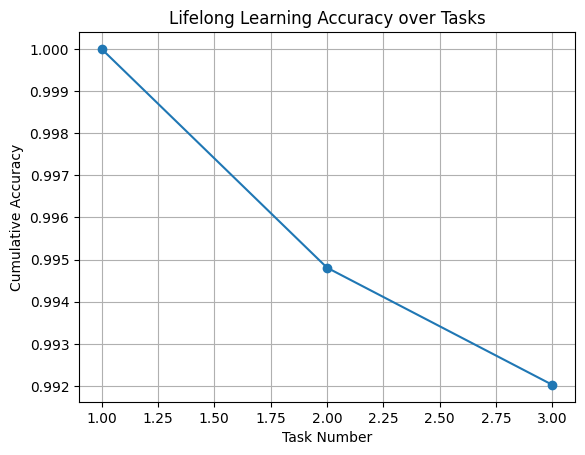

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(all_accuracies)+1), all_accuracies, marker='o')
plt.xlabel('Task Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Lifelong Learning Accuracy over Tasks')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Static model trained only on Task 1
X_static = tasks[0].drop(columns=['Label'])
y_static = tasks[0]['Label']
knn_static = KNeighborsClassifier(n_neighbors=3)
knn_static.fit(X_static, y_static)

# Evaluate on Task 2 and Task 3
for i in [1, 2]:
    X_test = tasks[i].drop(columns=['Label'])
    y_test = tasks[i]['Label']
    y_pred = knn_static.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Static Model Accuracy on Task {i+1}: {acc:.4f}")


Static Model Accuracy on Task 2: 0.8904
Static Model Accuracy on Task 3: 0.7677


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

    # Additional evaluation metrics
precision = precision_score(y_task, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_task, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_task, y_pred, average='weighted', zero_division=0)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

    # Full classification report
print("\nClassification Report:")
print(classification_report(y_task, y_pred, digits=4, zero_division=0))


Precision: 0.5894
Recall:    0.7677
F1-Score:  0.6668

Classification Report:
              precision    recall  f1-score   support

           0     0.7677    1.0000    0.8686      4247
           1     0.0000    0.0000    0.0000       824
           3     0.0000    0.0000    0.0000       461

    accuracy                         0.7677      5532
   macro avg     0.2559    0.3333    0.2895      5532
weighted avg     0.5894    0.7677    0.6668      5532

